# Project

## Title: Sentiment Analysis on Sephora Product Reviews
<b>Problem Statement:</b> Sephora receives thousands of unstructured product reviews that hold valuable insights into customer satisfaction and preferences. We aim to perform sentiment analysis on these reviews to identify patterns in customer opinions and provide actionable insights for improving products and marketing strategies.

## Dataset Source Information

Dataset Title: Sephora Products and Skincare Reviews
<br> Source: https://www.kaggle.com/datasets/nadyinky/sephora-products-and-skincare-reviews

In [1]:
import pandas as pd
import numpy as np

files = [
    "sephora dataset/reviews_0-250.csv",
    "sephora dataset/reviews_250-500.csv",
    "sephora dataset/reviews_500-750.csv",
    "sephora dataset/reviews_750-1250.csv",
    "sephora dataset/reviews_1250-end.csv"
]

# Read and concatenate
df_list = [pd.read_csv(file) for file in files]
df = pd.concat(df_list, ignore_index=True)
df.head()

C:\Users\Ukasy\AppData\Local\Temp\ipykernel_25108\236183792.py:13: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(file) for file in files]
C:\Users\Ukasy\AppData\Local\Temp\ipykernel_25108\236183792.py:13: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(file) for file in files]
C:\Users\Ukasy\AppData\Local\Temp\ipykernel_25108\236183792.py:13: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(file) for file in files]


,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


## Data Preprocessing

In [2]:
#Remove irrelevant columns
df = df.drop(columns=['Unnamed: 0', 'author_id', 'helpfulness', 'review_title', 'product_id'])

In [3]:
#Check for null values 
print(df.isnull().sum())

rating                           0
is_recommended              167988
total_feedback_count             0
total_neg_feedback_count         0
total_pos_feedback_count         0
submission_time                  0
review_text                   1444
skin_tone                   170539
eye_color                   209628
skin_type                   111557
hair_color                  226768
product_name                     0
brand_name                       0
price_usd                        0
dtype: int64


In [4]:
#Remove all null values
df = df.dropna().reset_index(drop=True)
print(df.isnull().sum())

rating                      0
is_recommended              0
total_feedback_count        0
total_neg_feedback_count    0
total_pos_feedback_count    0
submission_time             0
review_text                 0
skin_tone                   0
eye_color                   0
skin_type                   0
hair_color                  0
product_name                0
brand_name                  0
price_usd                   0
dtype: int64


In [5]:
#Review distribution for each brand
df['brand_name'].value_counts()

brand_name
Tatcha             41464
Drunk Elephant     36600
The Ordinary       33490
Glow Recipe        28234
fresh              27074
                   ...  
iluminage             23
Gisou                 23
Soleil Toujours       16
caliray                7
Erno Laszlo            2
Name: count, Length: 142, dtype: int64

In [6]:
#Adding sentiment label for model usage
def label_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'

df['label'] = df['rating'].apply(label_sentiment)

# Check distribution
print(df['label'].value_counts())

label
positive    689644
negative     88527
neutral      65331
Name: count, dtype: int64


In [7]:
#lowercase and remove punctuation 
df['review_text'] = df['review_text'].str.lower()

import re
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

df['review_text'] = df['review_text'].apply(remove_punctuation)

In [8]:
# Remove Stopwords & Lemmatize
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return ' '.join(words)

df['cleaned_review'] = df['review_text'].apply(preprocess)
df[['review_text', 'cleaned_review']].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ukasy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ukasy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,review_text,cleaned_review
0,my review title says it all i get so excited t...,review title say get excited get bed apply lip...
1,the scent isnt my favourite but it works great...,scent isnt favourite work great put every nigh...
2,ill give this 2 stars for nice packaging and l...,ill give 2 star nice packaging lovely scent up...
3,i use this at night or while im putting makeup...,use night im putting makeup love way dont reap...
4,i love this stuff i first had the sample size ...,love stuff first sample size sephora birthday ...


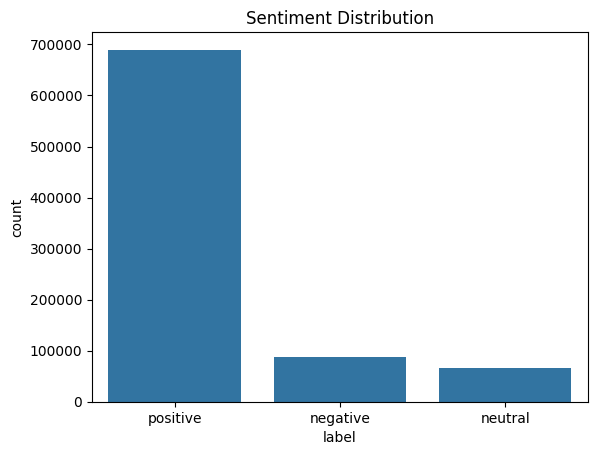

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label', data=df)
plt.title('Sentiment Distribution')
plt.show()

## Feature Engineering 

In [12]:
# resampling dataset to avoid class imbalance
from sklearn.utils import resample
import pandas as pd

# Split by class
df_pos = df[df['label'] == 'positive']
df_neg = df[df['label'] == 'negative']
df_neu = df[df['label'] == 'neutral']

# Downsample positive (majority class) to 88k
df_pos_down = resample(df_pos, 
                       replace=False, 
                       n_samples=88000, 
                       random_state=42)

# Downsample negative to 88k
df_neg_down = resample(df_neg, 
                     replace=False, 
                     n_samples=88000, 
                     random_state=42)

# Upsample neutral to 88k
df_neu_up = resample(df_neu, 
                     replace=True, 
                     n_samples=88000, 
                     random_state=42)

# Combine all
df_balanced = pd.concat([df_pos_down, df_neg_down, df_neu_up]).sample(frac=1, random_state=42).reset_index(drop=True)

# Check result
print(df_balanced['label'].value_counts())

label
positive    88000
negative    88000
neutral     88000
Name: count, dtype: int64


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Prepare Features and Labels
X = df_balanced['cleaned_review']

le = LabelEncoder()
y = le.fit_transform(df_balanced['label'])

# Split Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

#Display Results

# Shape of the TF-IDF vectors
print("Shape of training TF-IDF matrix:", X_train_vec.shape)
print("Shape of testing TF-IDF matrix:", X_test_vec.shape)

# Top 10 TF-IDF features
print("\nTop 10 TF-IDF Features:")
print(vectorizer.get_feature_names_out()[:10])

# Sample vector (first training sample)
print("\nSample TF-IDF vector (first training sample):")
print(X_train_vec[0])

# Sample vector in array format
print("\nArray format of the first training sample:")
print(X_train_vec[0].toarray())

Shape of training TF-IDF matrix: (211200, 5000)
Shape of testing TF-IDF matrix: (52800, 5000)

Top 10 TF-IDF Features:
['05' '10' '100' '1000' '1010' '1015' '10x' '11' '110' '12']

Sample TF-IDF vector (first training sample):
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 29 stored elements and shape (1, 5000)>
  Coords	Values
  (0, 880)	0.1768105915788724
  (0, 3995)	0.10779066805158691
  (0, 1351)	0.0972326555864318
  (0, 2957)	0.23500635088085
  (0, 1172)	0.25510137157325796
  (0, 3825)	0.2560996975304096
  (0, 2568)	0.08759589322958394
  (0, 305)	0.1584467771564702
  (0, 4159)	0.19705091070545588
  (0, 1821)	0.15515607117250127
  (0, 1593)	0.08683732792905824
  (0, 2611)	0.21468248582456834
  (0, 4731)	0.08547497642559994
  (0, 3884)	0.23874815933871224
  (0, 3279)	0.1994645858115019
  (0, 1509)	0.17831238280166825
  (0, 2551)	0.11872625695620535
  (0, 2822)	0.179944128883747
  (0, 2465)	0.1535536048874438
  (0, 660)	0.25352680724732823
  (0, 375)	0.2185668612299361

## Traditional ML

In [17]:
# Train Logistic Regression + Evaluate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Train Logistic Regression + Evaluate
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_vec, y_train)
lr_pred = lr_model.predict(X_test_vec)

print("Logistic Regression - Classification Report:\n")
print(classification_report(y_test, lr_pred))
print("Logistic Regression - Confusion Matrix:\n")
print(confusion_matrix(y_test, lr_pred))

# K-Fold Cross-Validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(lr_model, vectorizer.transform(X), y, cv=kfold, scoring='accuracy')

print("\nK-Fold Cross-Validation Scores:", cv_scores)
print("Mean Accuracy: {:.4f}".format(np.mean(cv_scores)))
print("Standard Deviation: {:.4f}".format(np.std(cv_scores)))

Logistic Regression - Classification Report:

              precision    recall  f1-score   support

           0       0.74      0.74      0.74     17600
           1       0.66      0.65      0.65     17600
           2       0.83      0.83      0.83     17600

    accuracy                           0.74     52800
   macro avg       0.74      0.74      0.74     52800
weighted avg       0.74      0.74      0.74     52800

Logistic Regression - Confusion Matrix:

[[13081  3768   751]
 [ 3860 11443  2297]
 [  723  2196 14681]]

K-Fold Cross-Validation Scores: [0.74736742 0.74681818 0.74869318 0.74560606 0.74361742]
Mean Accuracy: 0.7464
Standard Deviation: 0.0017


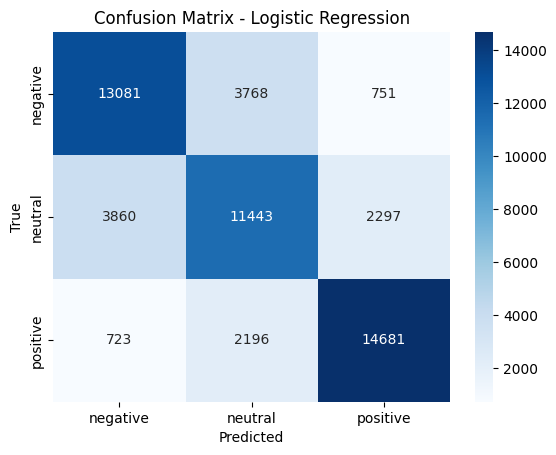

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Inverse transform the class numbers back to string labels (optional but clearer)
label_names = le.inverse_transform(sorted(np.unique(y_test)))  # le = your LabelEncoder

# Compute confusion matrix
cm = confusion_matrix(y_test, lr_pred)

# Plot
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_names, yticklabels=label_names)

plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [19]:
# Train Naive Bayes + Evaluate
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
nb_pred = nb_model.predict(X_test_vec)

print("Naive Bayes - Classification Report:\n")
print(classification_report(y_test, nb_pred))

print("Naive Bayes - Confusion Matrix:\n")
print(confusion_matrix(y_test, nb_pred))

# K-Fold Cross-Validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(nb_model, vectorizer.transform(X), y, cv=kfold, scoring='accuracy')

print("\nK-Fold Cross-Validation Scores:", cv_scores)
print("Mean Accuracy: {:.4f}".format(np.mean(cv_scores)))
print("Standard Deviation: {:.4f}".format(np.std(cv_scores)))

Naive Bayes - Classification Report:

              precision    recall  f1-score   support

           0       0.70      0.71      0.71     17600
           1       0.62      0.65      0.63     17600
           2       0.82      0.79      0.80     17600

    accuracy                           0.71     52800
   macro avg       0.72      0.71      0.71     52800
weighted avg       0.72      0.71      0.71     52800

Naive Bayes - Confusion Matrix:

[[12465  4291   844]
 [ 4016 11357  2227]
 [ 1202  2530 13868]]

K-Fold Cross-Validation Scores: [0.71517045 0.71729167 0.71715909 0.71507576 0.71356061]
Mean Accuracy: 0.7157
Standard Deviation: 0.0014


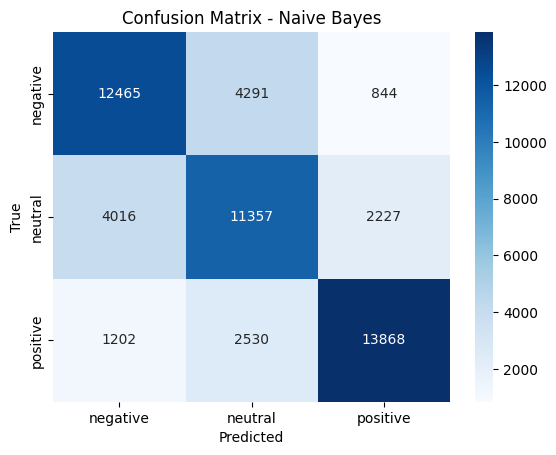

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Inverse transform the class numbers back to string labels (optional but clearer)
label_names = le.inverse_transform(sorted(np.unique(y_test)))  # le = your LabelEncoder

# Compute confusion matrix
cm = confusion_matrix(y_test, nb_pred)

# Plot
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_names, yticklabels=label_names)

plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [21]:
# Train SVM + Evaluate
from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train_vec, y_train)
svm_pred = svm_model.predict(X_test_vec)

print("SVM - Classification Report:\n")
print(classification_report(y_test, svm_pred))

print("SVM - Confusion Matrix:\n")
print(confusion_matrix(y_test, svm_pred))

# K-Fold Cross-Validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(svm_model, vectorizer.transform(X), y, cv=kfold, scoring='accuracy')

print("\nK-Fold Cross-Validation Scores:", cv_scores)
print("Mean Accuracy: {:.4f}".format(np.mean(cv_scores)))
print("Standard Deviation: {:.4f}".format(np.std(cv_scores)))

SVM - Classification Report:

              precision    recall  f1-score   support

           0       0.73      0.75      0.74     17600
           1       0.67      0.63      0.65     17600
           2       0.81      0.84      0.83     17600

    accuracy                           0.74     52800
   macro avg       0.74      0.74      0.74     52800
weighted avg       0.74      0.74      0.74     52800

SVM - Confusion Matrix:

[[13150  3532   918]
 [ 4038 11071  2491]
 [  781  1970 14849]]

K-Fold Cross-Validation Scores: [0.74373106 0.74193182 0.74598485 0.74293561 0.74026515]
Mean Accuracy: 0.7430
Standard Deviation: 0.0019


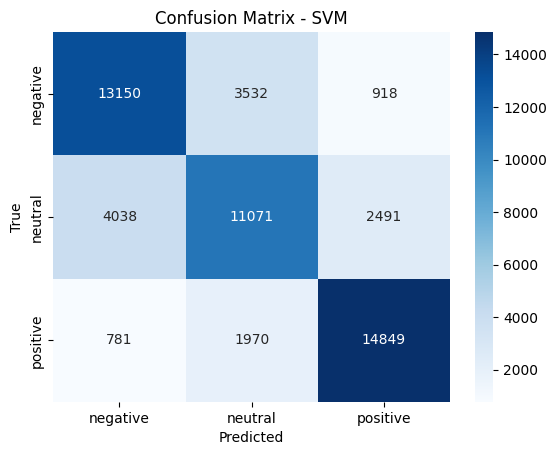

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Inverse transform the class numbers back to string labels (optional but clearer)
label_names = le.inverse_transform(sorted(np.unique(y_test)))  # le = your LabelEncoder

# Compute confusion matrix
cm = confusion_matrix(y_test, svm_pred)

# Plot
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_names, yticklabels=label_names)

plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [23]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import pandas as pd

# Collect all results
models = {
    'Logistic Regression': lr_pred,
    'Naive Bayes': nb_pred,
    'SVM': svm_pred
}

# Create a list to store evaluation metrics
metrics = []

for model_name, predictions in models.items():
    acc = accuracy_score(y_test, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, predictions, average='weighted')
    
    metrics.append({
        'Model': model_name,
        'Accuracy': round(acc, 4),
        'Precision': round(precision, 4),
        'Recall': round(recall, 4),
        'F1-Score': round(f1, 4)
    })

# Create DataFrame
results_df = pd.DataFrame(metrics)

# Display the table
print("\n📊 Model Comparison:\n")
print(results_df)


📊 Model Comparison:

                 Model  Accuracy  Precision  Recall  F1-Score
0  Logistic Regression    0.7425     0.7420  0.7425    0.7422
1          Naive Bayes    0.7138     0.7161  0.7138    0.7148
2                  SVM    0.7400     0.7377  0.7400    0.7385


## Transformers

In [24]:
# Required imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from torch.utils.data import Dataset
import torch

In [38]:
# Subsample dataset
df_subset = df_balanced.sample(n=20000, random_state=42).reset_index(drop=True)

# Encode labels
le = LabelEncoder()
df_subset['label_enc'] = le.fit_transform(df_subset['label'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df_subset['review_text'], df_subset['label_enc'],
    test_size=0.2, stratify=df_subset['label_enc'], random_state=42
)

# Metrics function
def compute_metrics(pred):
    preds = np.argmax(pred.predictions, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(pred.label_ids, preds, average='weighted')
    acc = accuracy_score(pred.label_ids, preds)
    return {'accuracy': acc, 'precision': precision, 'recall': recall, 'f1': f1}

In [40]:
# BERT
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("✅ Using device:", device)
if torch.cuda.is_available():
    print("🖥️ GPU Name:", torch.cuda.get_device_name(0))

# Tokenization
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
train_encodings = tokenizer(list(X_train), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(list(X_test), truncation=True, padding=True, max_length=128)

# Custom Dataset class
class ReviewDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.labels)

train_dataset = ReviewDataset(train_encodings, list(y_train))
test_dataset = ReviewDataset(test_encodings, list(y_test))

# Load model and move to device
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)
model.to(device)

# Training arguments
training_args = TrainingArguments(
    output_dir="./results_bert",
    evaluation_strategy="epoch",
    num_train_epochs=2,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    logging_dir="./logs_bert",
    logging_strategy="epoch",
    save_strategy="no",
    load_best_model_at_end=False,
    report_to="none"  # Disable wandb/huggingface logging
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

# Train and evaluate
trainer.train()
results = trainer.evaluate()
print("📊 BERT Results:", results)

bert_metrics = {
    'model': 'BERT',
    'accuracy': results['eval_accuracy'],
    'precision': results['eval_precision'],
    'recall': results['eval_recall'],
    'f1': results['eval_f1'],
    'loss': results['eval_loss']
}

✅ Using device: cuda
🖥️ GPU Name: NVIDIA GeForce RTX 2070


C:\Users\Ukasy\anaconda3\envs\MAIN\Lib\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.608000,0.598760,0.757000,0.777076,0.757000,0.755111
2,0.392400,0.585076,0.795750,0.799680,0.795750,0.797120


📊 BERT Results: {'eval_loss': 0.5850759148597717, 'eval_accuracy': 0.79575, 'eval_precision': 0.7996795090508168, 'eval_recall': 0.79575, 'eval_f1': 0.7971204102849431, 'eval_runtime': 26.7888, 'eval_samples_per_second': 149.316, 'eval_steps_per_second': 18.665, 'epoch': 2.0}


In [41]:
# DISTILBERT
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("✅ Using device:", device)
if torch.cuda.is_available():
    print("🖥️ GPU Name:", torch.cuda.get_device_name(0))

# Tokenization
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")
train_encodings = tokenizer(list(X_train), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(list(X_test), truncation=True, padding=True, max_length=128)

# Custom Dataset class
class ReviewDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.labels)

train_dataset = ReviewDataset(train_encodings, list(y_train))
test_dataset = ReviewDataset(test_encodings, list(y_test))

# Load model and move to device
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=3)
model.to(device)

# Training arguments
training_args = TrainingArguments(
    output_dir="./results_distilbert",
    evaluation_strategy="epoch",
    num_train_epochs=2,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    logging_dir="./logs_distilbert",
    logging_strategy="epoch",
    save_strategy="no",
    load_best_model_at_end=False,
    report_to="none"  # Disable WandB or other integrations
)

# Trainer setup
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

# Train and evaluate
trainer.train()
results = trainer.evaluate()
print("📊 DistilBERT Results:", results)

distilbert_metrics = {
    'model': 'DistilBERT',
    'accuracy': results['eval_accuracy'],
    'precision': results['eval_precision'],
    'recall': results['eval_recall'],
    'f1': results['eval_f1'],
    'loss': results['eval_loss']
}

✅ Using device: cuda
🖥️ GPU Name: NVIDIA GeForce RTX 2070


C:\Users\Ukasy\anaconda3\envs\MAIN\Lib\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.635100,0.551639,0.766250,0.776920,0.766250,0.769271
2,0.410600,0.592725,0.784000,0.787495,0.784000,0.785402


📊 DistilBERT Results: {'eval_loss': 0.5927245020866394, 'eval_accuracy': 0.784, 'eval_precision': 0.7874945451792302, 'eval_recall': 0.784, 'eval_f1': 0.7854024981644845, 'eval_runtime': 12.2437, 'eval_samples_per_second': 326.7, 'eval_steps_per_second': 40.837, 'epoch': 2.0}


In [39]:
# ROBERTA
from transformers import RobertaTokenizerFast, RobertaForSequenceClassification, Trainer, TrainingArguments

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("✅ Using device:", device)
if torch.cuda.is_available():
    print("🖥️ GPU Name:", torch.cuda.get_device_name(0))

# Tokenization
tokenizer = RobertaTokenizerFast.from_pretrained("roberta-base")
train_encodings = tokenizer(list(X_train), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(list(X_test), truncation=True, padding=True, max_length=128)

# Custom Dataset class
class ReviewDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.labels)

train_dataset = ReviewDataset(train_encodings, list(y_train))
test_dataset = ReviewDataset(test_encodings, list(y_test))

# Load model and move to device
model = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=3)
model.to(device)

# Training arguments
training_args = TrainingArguments(
    output_dir="./results_roberta",
    evaluation_strategy="epoch",
    num_train_epochs=2,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    logging_dir="./logs_roberta",
    logging_strategy="epoch",
    save_strategy="no",
    load_best_model_at_end=False,
    report_to="none"  # Disable wandb/huggingface logging
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

# Train and evaluate
trainer.train()
results = trainer.evaluate()
print("📊 RoBERTa Results:", results)

roberta_metrics = {
    'model': 'RoBERTa',
    'accuracy': results['eval_accuracy'],
    'precision': results['eval_precision'],
    'recall': results['eval_recall'],
    'f1': results['eval_f1'],
    'loss': results['eval_loss']
}

✅ Using device: cuda
🖥️ GPU Name: NVIDIA GeForce RTX 2070


C:\Users\Ukasy\anaconda3\envs\MAIN\Lib\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.738100,0.635902,0.733750,0.768446,0.733750,0.727540
2,0.493300,0.536426,0.788250,0.788801,0.788250,0.788481


📊 RoBERTa Results: {'eval_loss': 0.5364263653755188, 'eval_accuracy': 0.78825, 'eval_precision': 0.7888007173876078, 'eval_recall': 0.78825, 'eval_f1': 0.7884809841064777, 'eval_runtime': 27.8912, 'eval_samples_per_second': 143.415, 'eval_steps_per_second': 17.927, 'epoch': 2.0}


In [42]:
comparison_df = pd.DataFrame([bert_metrics, distilbert_metrics, roberta_metrics])
print("📊 Transformer Comparison:\n", comparison_df.sort_values(by='f1', ascending=False))

📊 Transformer Comparison:
         model  accuracy  precision   recall        f1      loss
0        BERT   0.79575   0.799680  0.79575  0.797120  0.585076
2     RoBERTa   0.78825   0.788801  0.78825  0.788481  0.536426
1  DistilBERT   0.78400   0.787495  0.78400  0.785402  0.592725


## Opinion Mining

In [46]:
import spacy
from tqdm import tqdm

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Enable tqdm for progress bar
tqdm.pandas()

# Function to extract opinions from a spaCy Doc
def extract_opinions_from_doc(doc):
    opinions = []
    for token in doc:
        # Adjective modifying a noun
        if token.dep_ == "amod" and token.head.pos_ == "NOUN":
            opinions.append((token.text, token.head.text))
        # Direct object of a verb
        elif token.dep_ == "dobj" and token.head.pos_ == "VERB":
            opinions.append((token.head.text, token.text))
    return opinions

# Use nlp.pipe for fast processing
texts = df_subset['cleaned_review'].tolist()
docs = nlp.pipe(texts, batch_size=64)

# Extract opinions with progress bar
df_subset['opinions'] = [extract_opinions_from_doc(doc) for doc in tqdm(docs, total=len(texts))]

100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [01:27<00:00, 228.95it/s]


In [60]:
from collections import Counter
from itertools import chain
import pandas as pd

# Flatten list of opinions
all_opinions = list(chain.from_iterable(df_subset['opinions']))

# Count occurrences
opinion_counts = Counter(all_opinions)

# Convert to DataFrame
opinion_df = pd.DataFrame(opinion_counts.most_common(10), columns=['Opinion Pair', 'Count'])

# Display as table
print(opinion_df.to_string(index=False))


     Opinion Pair  Count
      (dry, skin)   1408
(sensitive, skin)   1277
     (oily, skin)    698
 (using, product)    565
      (long, way)    430
    (using, skin)    398
     (fine, line)    374
 (honest, review)    340
    (first, time)    326
 (great, product)    311


In [48]:
from collections import Counter
from itertools import chain

# Optional: map encoded labels back to strings for readability
df_subset['sentiment'] = le.inverse_transform(df_subset['label_enc'])

# Dictionary to store grouped opinions
grouped_opinions = {
    'positive': [],
    'negative': [],
    'neutral': []
}

# Group opinions based on sentiment
for sentiment in grouped_opinions.keys():
    subset = df_subset[df_subset['sentiment'] == sentiment]
    opinions = list(chain.from_iterable(subset['opinions']))
    grouped_opinions[sentiment] = Counter(opinions).most_common(10)

# Display top 10 opinions per sentiment
for sentiment, opinions in grouped_opinions.items():
    print(f"\n🔹 Top Opinions in {sentiment.capitalize()} Reviews:")
    for opinion, count in opinions:
        print(f"{opinion}: {count}")



🔹 Top Opinions in Positive Reviews:
('dry', 'skin'): 485
('sensitive', 'skin'): 437
('long', 'way'): 292
('using', 'product'): 209
('oily', 'skin'): 193
('great', 'product'): 176
('using', 'skin'): 171
('honest', 'review'): 159
('fine', 'line'): 152
('great', 'skin'): 135

🔹 Top Opinions in Negative Reviews:
('sensitive', 'skin'): 445
('dry', 'skin'): 417
('oily', 'skin'): 197
('using', 'product'): 174
('using', 'skin'): 119
('prone', 'skin'): 108
('used', 'product'): 97
('first', 'time'): 95
('left', 'skin'): 91
('fine', 'line'): 80

🔹 Top Opinions in Neutral Reviews:
('dry', 'skin'): 506
('sensitive', 'skin'): 395
('oily', 'skin'): 308
('using', 'product'): 182
('fine', 'line'): 142
('honest', 'review'): 134
('long', 'way'): 112
('using', 'skin'): 108
('good', 'product'): 107
('using', 'week'): 107


## Aspect-Based Sentiment Analysis (ABSA)

In [33]:
def extract_aspects(text):
    doc = nlp(text)
    # return [chunk.text.lower() for chunk in doc.noun_chunks]
    # Exclude 'i' and any pronouns
    return [token.lemma_ for token in doc if token.pos_ == "NOUN" and token.lemma_.lower() != "i"]

df_subset['aspects'] = df_subset['cleaned_review'].apply(extract_aspects)

In [34]:
df_subset['sentiment'] = le.inverse_transform(df_subset['label_enc'])

aspect_sentiment_pairs = []

for _, row in df_subset.iterrows():
    for aspect in row['aspects']:
        aspect_sentiment_pairs.append((aspect, row['sentiment']))

In [35]:
from collections import defaultdict, Counter

aspect_sentiment_map = defaultdict(list)
for aspect, sentiment in aspect_sentiment_pairs:
    aspect_sentiment_map[aspect].append(sentiment)

# Top 10 frequent aspects and their sentiment breakdown
for aspect, sentiments in Counter(dict(aspect_sentiment_map)).most_common(10):
    sentiment_count = Counter(aspect_sentiment_map[aspect])
    print(f"{aspect}: {dict(sentiment_count)}")

smoother: {'positive': 14}
disappoint: {'positive': 9}
friend: {'positive': 56, 'neutral': 16, 'negative': 24}
coat: {'positive': 11, 'neutral': 2}
tata: {'positive': 7, 'neutral': 2, 'negative': 2}
bar: {'positive': 13, 'neutral': 6, 'negative': 4}
nutrient: {'positive': 6, 'negative': 1}
compliment: {'positive': 6}
lot: {'positive': 198, 'neutral': 208, 'negative': 124}
sensitivity: {'positive': 20, 'neutral': 21, 'negative': 11}


In [36]:
# Select 10 random samples
sample_df = df_subset.sample(10, random_state=42)

# Display review, aspects, and sentiment
for idx, row in sample_df.iterrows():
    print("\n🔹 Review:")
    print(row['review_text'])
    print("\nAspects:", row['aspects'])
    print("Sentiment:", row['sentiment'])
    print("="*80)


🔹 Review:
i had a full size jar and am almost done with it  i can safely say this is one of the least moisturizing creams ever  its lightweight and i feel like i have no moisturizer on after it soaks in  very watery in consistency not a thick cream  i generally like kate somerville products of this did nothing for my skin i have dry skin not overly dry with a little oily around my nose  this was just such a waste of money  i had to finish it up so i could really be certain and on occasion i switched to a sample of some other moisturizer all being better than this  i will never repurchase this  this does nothing for my skin

Aspects: ['size', 'jar', 'cream', 'moisturizer', 'soak', 'consistency', 'cream', 'product', 'skin', 'skin', 'nose', 'waste', 'money', 'finish', 'occasion', 'sample', 'moisturizer', 'skin']
Sentiment: negative

🔹 Review:
great product for my skin holy grail even i have severely dry skin and i use this in my skin care routines and beforewith makeup whatever foundatio

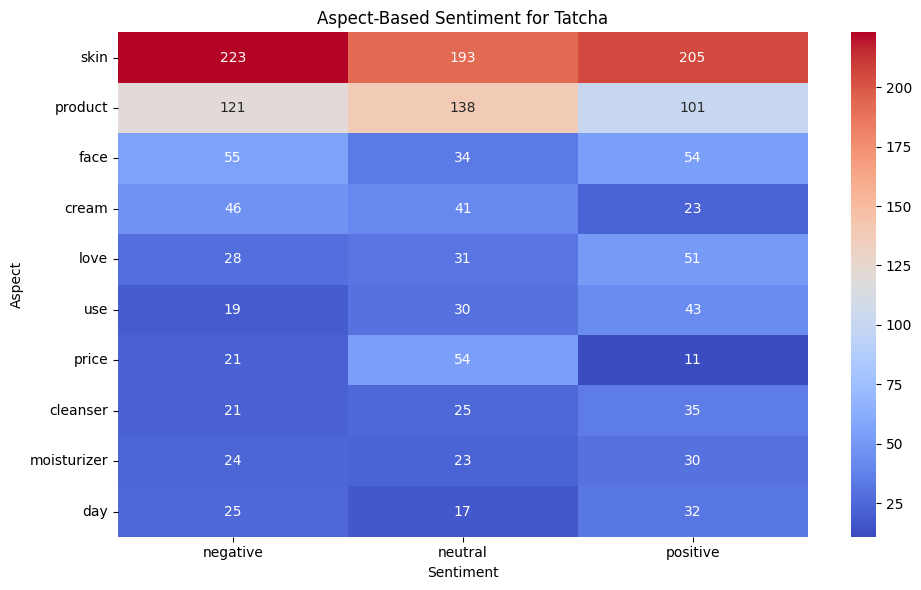

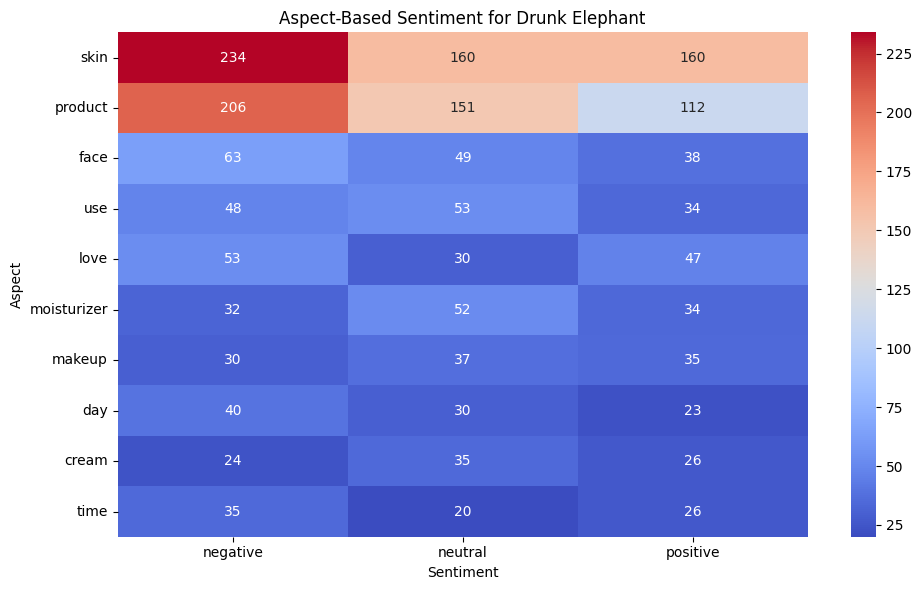

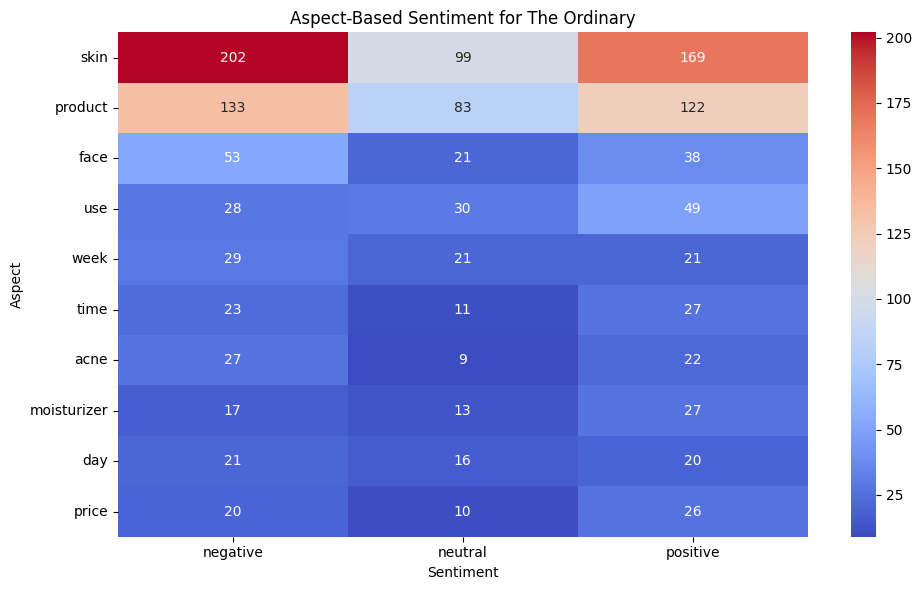

In [37]:
# Select top 3 brands by review count
top_brands = df['brand_name'].value_counts().head(3).index

for brand in top_brands:
    brand_df = df_subset[df_subset['brand_name'] == brand]
    # Explode aspects for grouping
    df_exploded = brand_df.explode('aspects')
    # Group by aspect and sentiment label
    aspect_sentiment = df_exploded.groupby(['aspects', 'label']).size().unstack(fill_value=0)
    # Select top 10 aspects by total mentions
    top_aspects = aspect_sentiment.sum(axis=1).sort_values(ascending=False).head(10).index
    aspect_sentiment = aspect_sentiment.loc[top_aspects]

    plt.figure(figsize=(10, 6))
    sns.heatmap(aspect_sentiment, annot=True, fmt='d', cmap='coolwarm')
    plt.title(f'Aspect-Based Sentiment for {brand}')
    plt.xlabel('Sentiment')
    plt.ylabel('Aspect')
    plt.tight_layout()
    plt.show()

## Visualizations

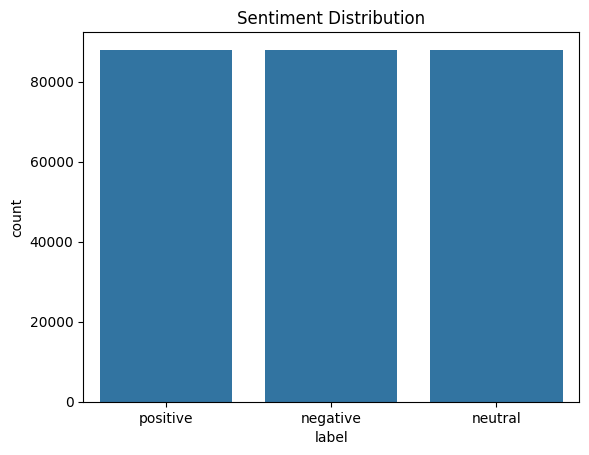

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label', data=df_balanced)
plt.title('Sentiment Distribution')
plt.show()

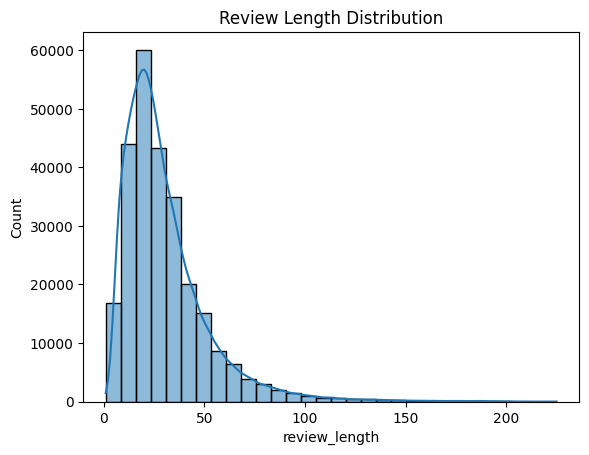

In [53]:
df_balanced['review_length'] = df_balanced['cleaned_review'].apply(lambda x: len(str(x).split()))
sns.histplot(data=df_balanced, x='review_length', bins=30, kde=True)
plt.title("Review Length Distribution")
plt.show()

Unique labels: ['positive' 'negative' 'neutral']


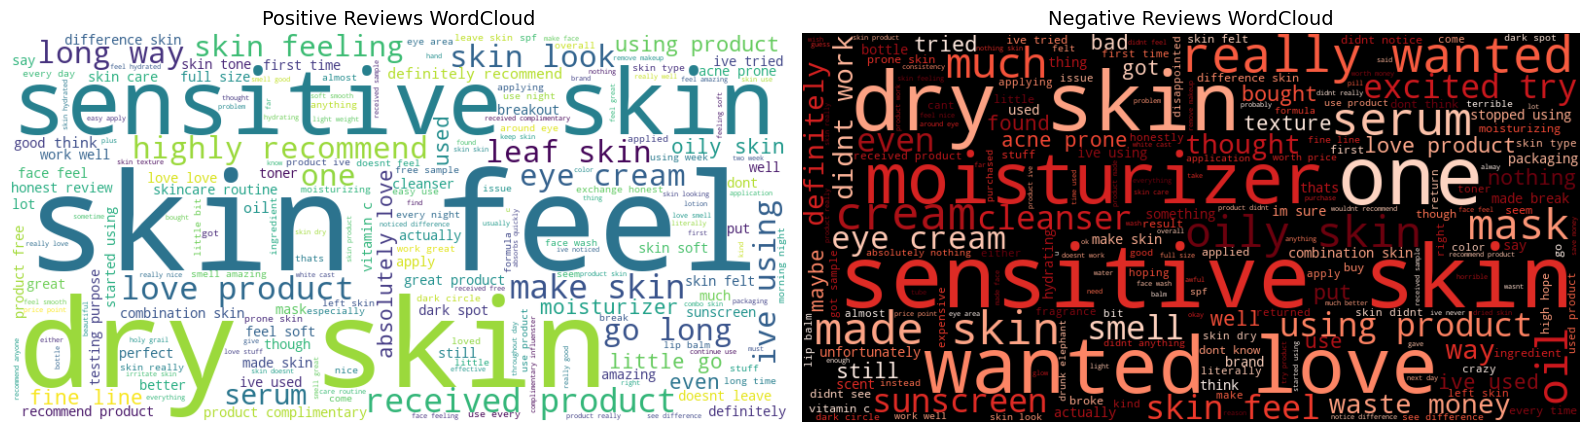

In [58]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Optional: Check unique labels
print("Unique labels:", df_balanced['label'].unique())

# Generate positive review word cloud
positive_reviews = " ".join(df_balanced[df_balanced['label'] == 'positive']['cleaned_review'].dropna().astype(str))
negative_reviews = " ".join(df_balanced[df_balanced['label'] == 'negative']['cleaned_review'].dropna().astype(str))

# Set up the figure
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Positive WordCloud
if positive_reviews.strip():
    wc_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
    axes[0].imshow(wc_pos, interpolation='bilinear')
    axes[0].set_title("Positive Reviews WordCloud", fontsize=14)
    axes[0].axis('off')
else:
    print("No positive reviews found.")

# Negative WordCloud
if negative_reviews.strip():
    wc_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_reviews)
    axes[1].imshow(wc_neg, interpolation='bilinear')
    axes[1].set_title("Negative Reviews WordCloud", fontsize=14)
    axes[1].axis('off')
else:
    print("No negative reviews found.")

plt.tight_layout()
plt.show()

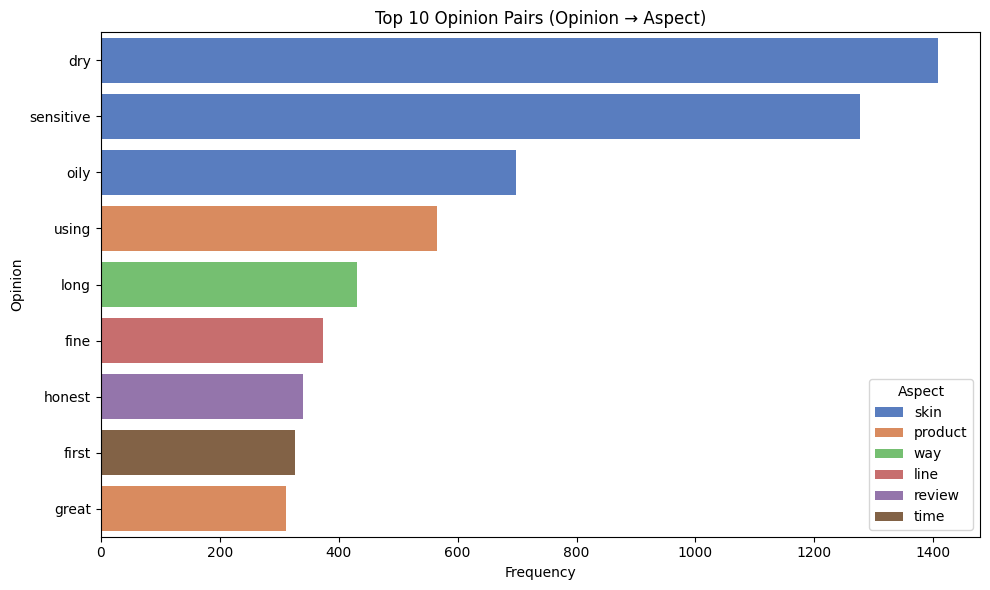

In [54]:
from collections import Counter
from itertools import chain
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract most common opinion pairs
all_opinions = list(chain.from_iterable(df_subset['opinions']))
common_opinions = Counter(all_opinions).most_common(10)

# ✅ Fix: Separate the pairs into two columns
op_df = pd.DataFrame(common_opinions, columns=['Pair', 'Count'])
op_df[['Opinion', 'Aspect']] = pd.DataFrame(op_df['Pair'].tolist(), index=op_df.index)

# Now plot
plt.figure(figsize=(10, 6))
sns.barplot(data=op_df, x='Count', y='Opinion', hue='Aspect', dodge=False, palette='muted')
plt.title("Top 10 Opinion Pairs (Opinion → Aspect)")
plt.xlabel("Frequency")
plt.ylabel("Opinion")
plt.tight_layout()
plt.show()


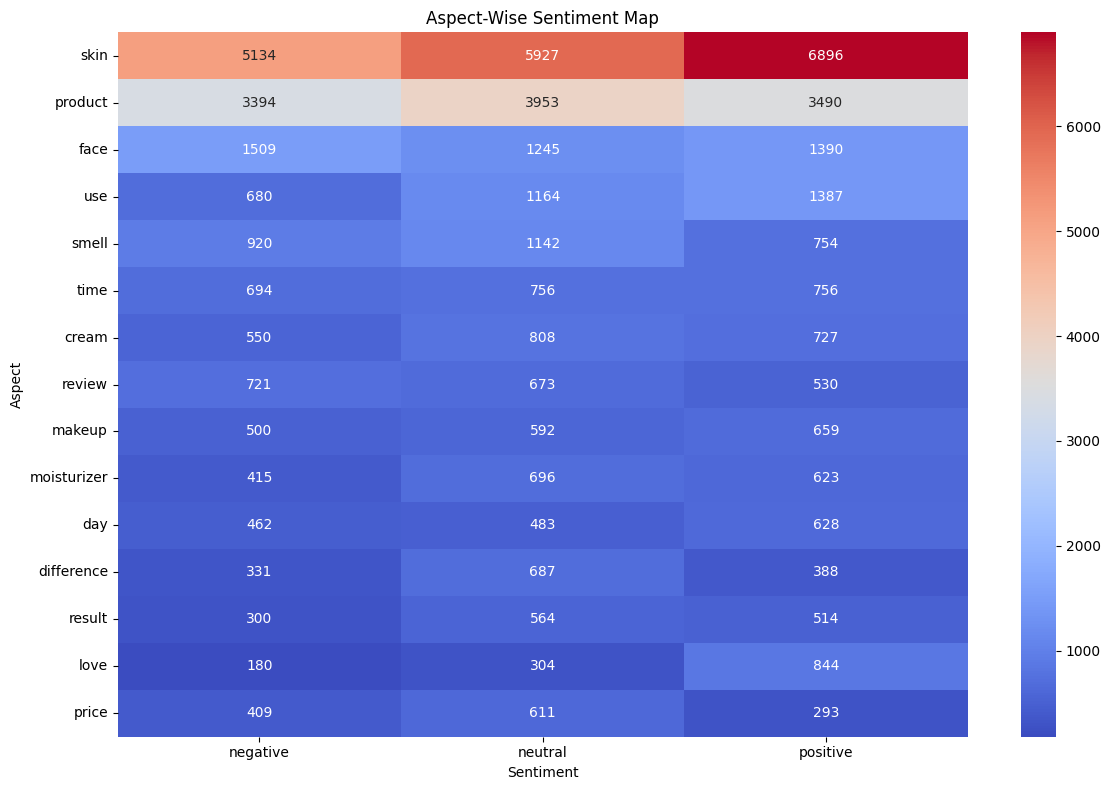

In [55]:
# Explode opinions
df_flat = df_subset.explode('opinions')

# Filter out invalid ones
df_flat = df_flat[df_flat['opinions'].apply(lambda x: isinstance(x, tuple) and len(x) == 2)]

# Unpack (modifier, aspect)
df_flat[['modifier', 'aspect']] = pd.DataFrame(df_flat['opinions'].tolist(), index=df_flat.index)

# Optional: Filter out numbers or short tokens as aspects
import re
df_flat = df_flat[df_flat['aspect'].apply(lambda x: isinstance(x, str) and not re.fullmatch(r'\d+.*', x) and len(x) > 2)]

# Group by aspect and sentiment label
aspect_sentiment = df_flat.groupby(['aspect', 'label']).size().unstack(fill_value=0)

# Optional: sort by total mentions
aspect_sentiment['total'] = aspect_sentiment.sum(axis=1)
aspect_sentiment = aspect_sentiment.sort_values(by='total', ascending=False).drop(columns='total')

# Select top 10-15 aspects for clarity
top_aspects = aspect_sentiment.head(15)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(top_aspects, annot=True, fmt='d', cmap='coolwarm')
plt.title("Aspect-Wise Sentiment Map")
plt.xlabel("Sentiment")
plt.ylabel("Aspect")
plt.tight_layout()
plt.show()

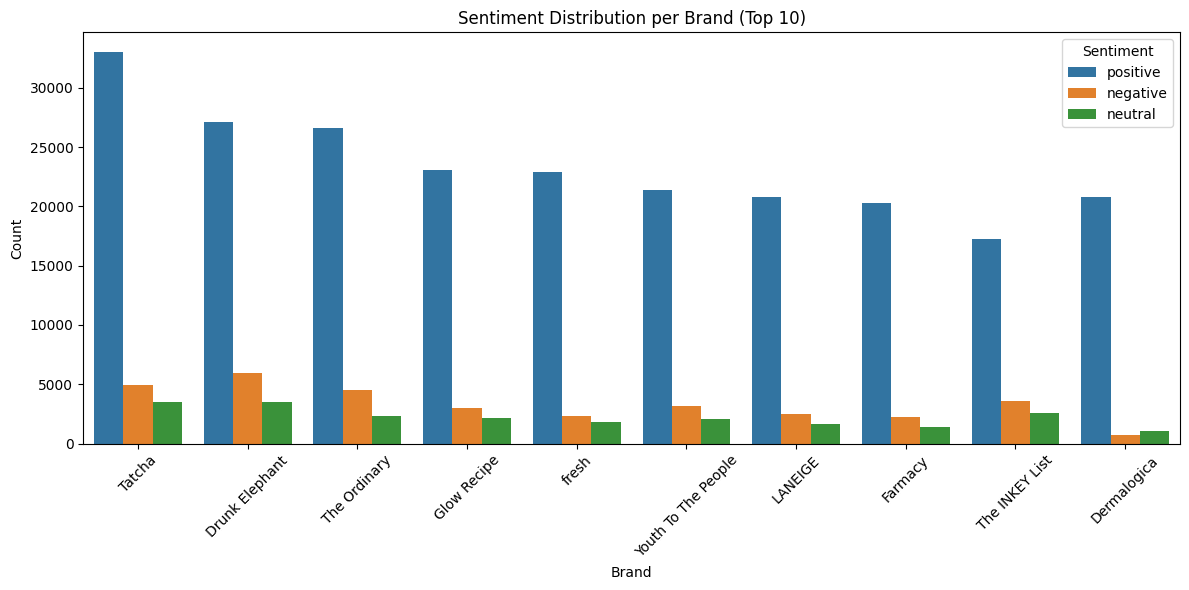

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='brand_name', hue='label', order=df['brand_name'].value_counts().index[:10])
plt.title("Sentiment Distribution per Brand (Top 10)")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()